# **Aero Fit Business Case**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
adata = pd.read_csv("aerofit_treadmill.csv")
adata

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Checking the shape of the data frame

In [ ]:
adata.shape

(180, 9)

In [ ]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
adata.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
''' Checking for null values in the dataset '''

adata.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

From the above cells we can see that there are no missing values in the dataset and also observerd the type of data in each column

In [ ]:
adata.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

From the above observations we can see that

1. There are 3 unique products namely **KP281,KP481,KP781**
2. Mean age of the customers is **28**   
3. Maximum and minumum ages of customers are 50 and 18 respectively
4. Average income of the customers is about 53,719
5. Average miles done by the customers is 103



Since there are 6 numerical field in the data lets start by doing univariate analysis on the fields

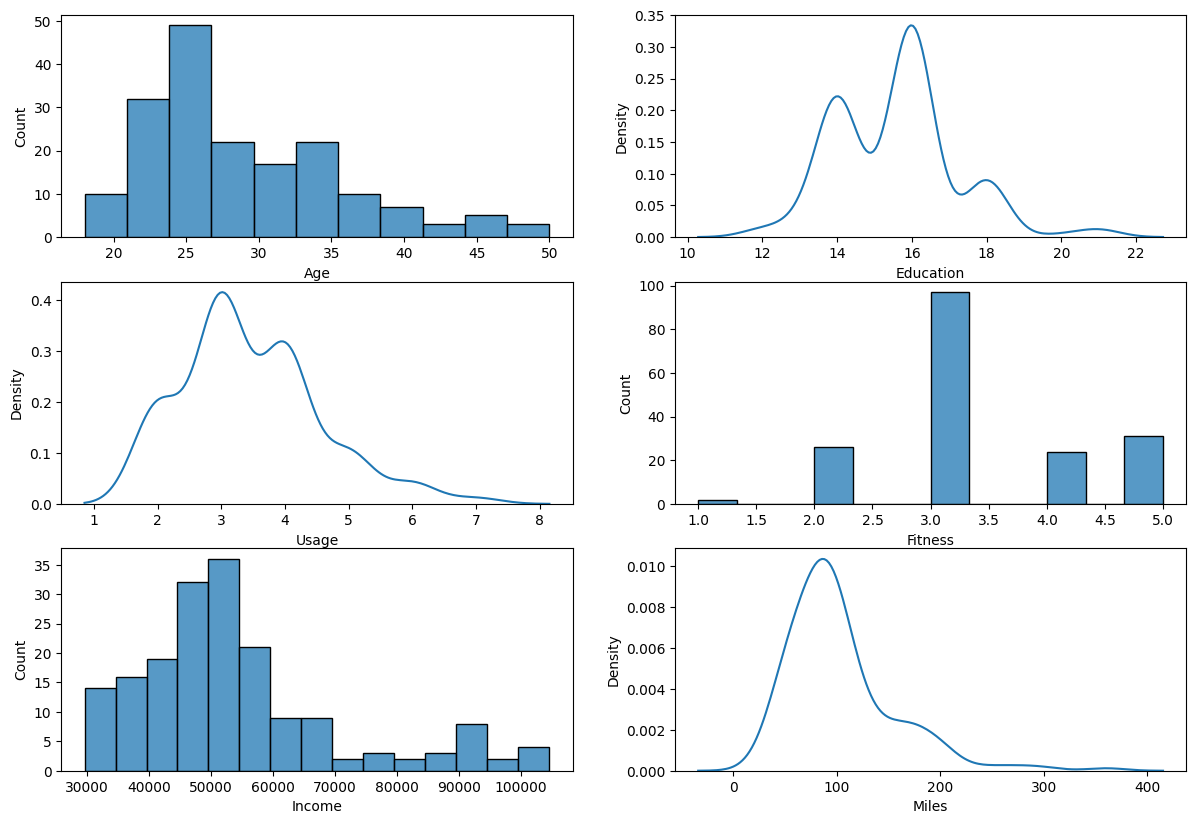

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(6, 4))
fig.subplots_adjust(right=2,top=2)
sns.histplot(data=adata, x="Age", ax=axis[0,0])
sns.kdeplot(data=adata, x="Education", ax=axis[0,1])
sns.kdeplot(data=adata, x="Usage", ax=axis[1,0])
sns.histplot(data=adata, x="Fitness", ax=axis[1,1])
sns.histplot(data=adata, x="Income", ax=axis[2,0])
sns.kdeplot(data=adata, x="Miles", ax=axis[2,1])
plt.show()

From the past observations we have the mean measures of age, income and miles done by the customers .Now lets see the impact of outliers on this

<Axes: xlabel='Miles'>

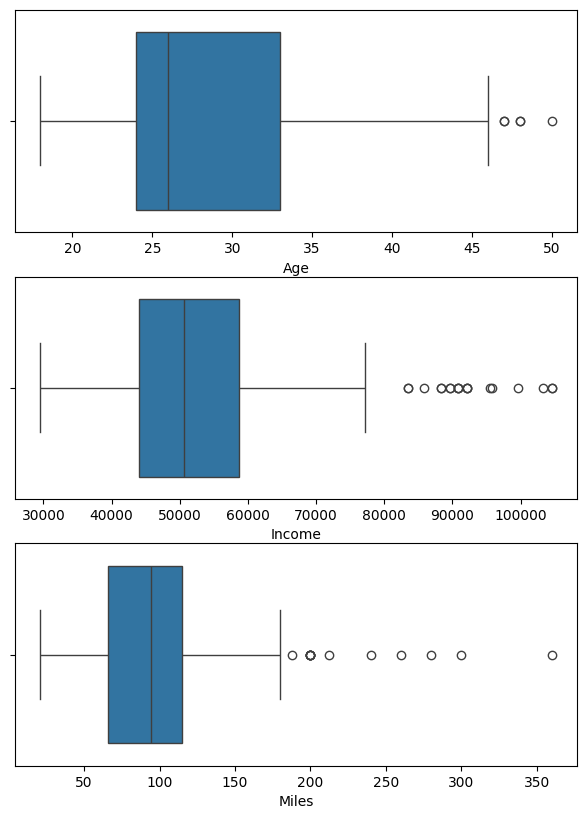

In [ ]:
fig,axis = plt.subplots(nrows=3,ncols=1,figsize=(3,4))
fig.subplots_adjust(right=2,top=2)
sns.boxplot(data=adata,x='Age',ax=axis[0])
sns.boxplot(data=adata,x='Income',ax=axis[1])
sns.boxplot(data=adata,x='Miles',ax=axis[2])

We can observe that the number of outliers in age is quite less when compared to Income and Miles.So we can state that using mean of income or miles in calculations or to draw any observations id not preferable since its influenced by the outliers  

<Axes: xlabel='Fitness'>

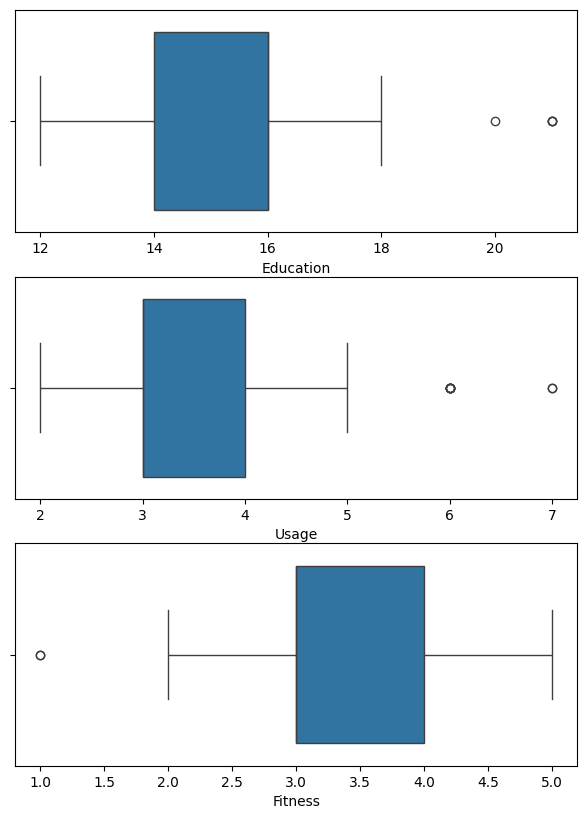

In [ ]:
fig,axis = plt.subplots(nrows=3,ncols=1,figsize=(3,4))
fig.subplots_adjust(right=2,top=2)
sns.boxplot(data=adata,x='Education',ax=axis[0])
sns.boxplot(data=adata,x='Usage',ax=axis[1])
sns.boxplot(data=adata,x='Fitness',ax=axis[2])

Lets analyze the impact of **age , gender** and **martial status**  on the product purchased

<Axes: xlabel='Product', ylabel='count'>

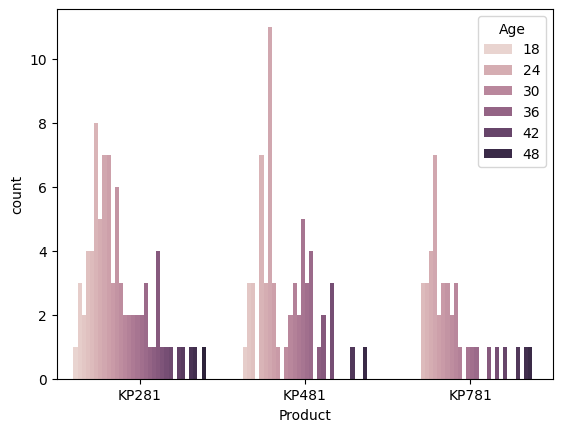

In [ ]:
sns.countplot(data=adata, x='Product',hue='Age')

From the above plot we can see that from age 18 to 36 are the majority of customers for all the 3 products

<Axes: xlabel='Product', ylabel='count'>

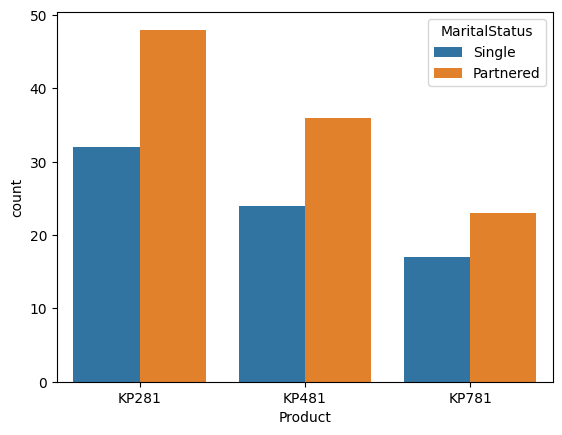

In [ ]:
sns.countplot(data=adata, x='Product',hue='MaritalStatus')

From the above plot we can say that customers who are partnered are more likely to purchase the product

<Axes: xlabel='Product', ylabel='count'>

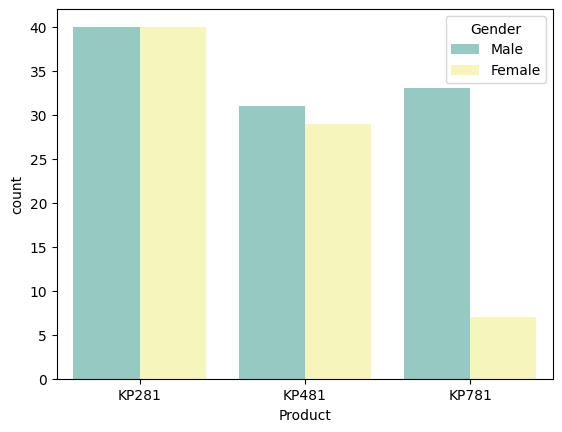

In [ ]:
sns.countplot(data=adata,x="Product",hue="Gender",palette = 'Set3')

We can see that there are more Male customers in general, where as for K281 the share is equal

In [ ]:
pd.crosstab(index=adata['Product'],columns=adata['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


From the above we can find the probabilty of female customer buying k481
i.e  31/60 = 0.516

In [ ]:
df2 = pd.cut(adata['Age'],bins=[10,20,30,40,50])
pd.crosstab(index=adata['Product'],columns=df2)

Age,"(10, 20]","(20, 30]","(30, 40]","(40, 50]"
Product,,,,
KP281,6,49,19,6
KP481,4,31,23,2
KP781,0,30,6,4


From the above we can see the distribution of customers in age  range of 20-30 are more likely to invest in threadmill products .The entry level product is the got to option for most of the consumers, proving that the price point is playing a major role in the sales of the product.

Lets try to observe the above distributions in terms of normalized count

In [ ]:
df = adata[['Product','MaritalStatus','Gender']].melt()
df.groupby(['variable','value'])['value'].count()/len(adata)

variable       value    
Gender         Female       0.422222
               Male         0.577778
MaritalStatus  Partnered    0.594444
               Single       0.405556
Product        KP281        0.444444
               KP481        0.333333
               KP781        0.222222
Name: value, dtype: float64

1. **Product**
    * 44.44% of the customers have purchased KP281 product.
    * 33.33% of the customers have purchased KP481 product.
    * 22.22% of the customers have purchased KP781 product.
2. **Gender**
    * 57.78% of the customers are Male.
3. **MaritalStatus**
    * 59.44% of the customers are Partnered.


<ipython-input-18-f0dd60a7a13d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(adata.corr(), cmap= "Blues",annot=True)


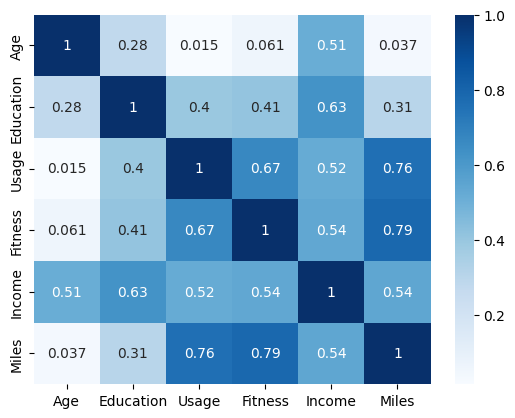

In [ ]:
sns.heatmap(adata.corr(), cmap= "Blues",annot=True)
plt.show()


The heat map reveals that:

* Miles and Fitness exhibit a strong positive correlation.
* The second highest correlation is observed between usage and miles, suggesting that consumers who use the treadmill more frequently tend to cover more miles.
* An increase in treadmill usage correlates with an increase in fitness levels.

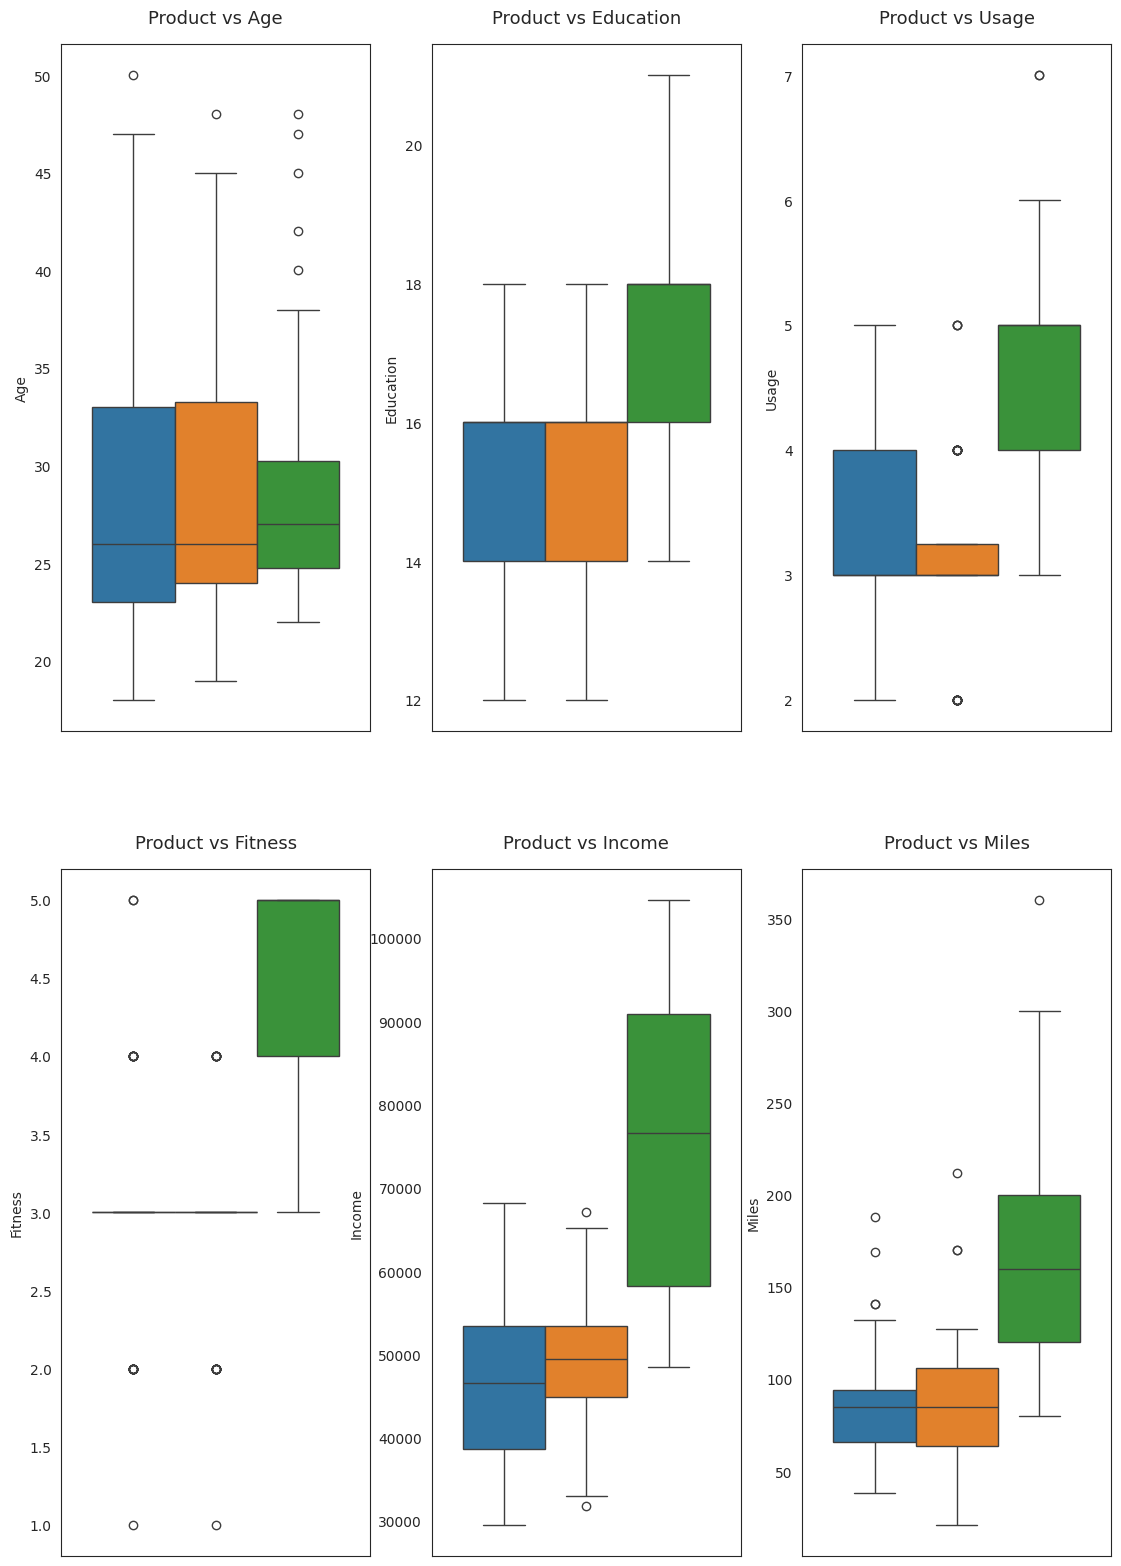

In [ ]:
a = ['Age', 'Education', 'Usage', 'Fitness', 'Income','Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig.subplots_adjust(right=1,top=2)
count = 0
for i in range(2):
  for j in range(3):
    sns.boxplot(data=adata, hue='Product', y=a[count],ax=axs[i,j],legend=False)
    axs[i,j].set_title(f"Product vs {a[count]}", fontsize=13,pad=15)
    count += 1

plt.show()

**Business Insights**

* With Restpect To Age:
    * Customers who purchase products KP281 and KP481 have the same median age value.
    * Customers aged between 25-30 are more inclined to purchase the KP781 product.
* In terms of education:
    * Customers with an education years greater than 16 are more likely to purchase the KP781 product.
    * Customers with an education years less than 16 have equal chances of purchasing either KP281 or KP481.
* Regarding usage:
    * Customers planning to use the treadmill more than 4 times a week are more likely to buy the KP781 product.
    * Other customers are likely to purchase either KP281 or KP481.
* Concerning fitness:
    * Customers with a fitness level of 3 or higher have a higher probability of purchasing the KP781 product.
* In relation to income:
    * The higher the customer's income (income greater than or equal to $60,000), the more likely they are to purchase the KP781 product.
* Regarding miles walked or run:
    * If a customer expects to walk/run more than 120 miles per week, they are more likely to buy the KP781 product.

Lets calculate the conditional probablity values for the 3 products

In [ ]:
df3 = pd.crosstab(index=adata['Gender'],columns=[adata['Product']])

KP781_Male = df3['KP781']['Male'] / df3.loc['Male'].sum()
KP481_Male = df3['KP481']['Male'] / df3.loc['Male'].sum()
KP281_Male = df3['KP281']['Male'] / df3.loc['Male'].sum()


KP781_Female = df3['KP781']['Female'] / df3.loc['Female'].sum()
KP481_Female = df3['KP481']['Female'] / df3.loc['Female'].sum()
KP281_Female = df3['KP281']['Female'] / df3.loc['Female'].sum()


print(f"P(KP781_Male): {KP781_Male:.2f}")
print(f"P(KP481_Male): {KP481_Male:.2f}")
print(f"P(KP281_Male): {KP281_Male:.2f}\n")

print(f"P(KP781_Female): {KP781_Female:.2f}")
print(f"P(KP481_Female): {KP481_Female:.2f}")
print(f"P(KP281_Female): {KP281_Female:.2f}\n")

P(KP781_Male): 0.32
P(KP481_Male): 0.30
P(KP281_Male): 0.38

P(KP781_Female): 0.09
P(KP481_Female): 0.38
P(KP281_Female): 0.53



For Marginal Probability of Males and Females

In [ ]:
print(f"P(Male): {df3.loc['Male'].sum()/len(adata):.2f}")
print(f"P(Female): {df3.loc['Female'].sum()/len(adata):.2f}\n")


P(Male): 0.58
P(Female): 0.42



**Recommendations**

1. Implement a targeted marketing campaign to highlight the unique features and benefits of KP481 and KP781, focusing on segments beyond the 20-30 age range to diversify the customer base and increase sales.
2. Offer exclusive promotions or discounts for KP481 and KP781 to incentivize purchases and encourage customers to explore the entire product range.
3. Develop partnerships with gyms, fitness centers, and wellness clubs to showcase the full range of products, targeting customers of varying fitness levels and age groups.
4. Introducing a loyalty program to reward repeat customers and encourage brand advocacy, offering perks such as discounts on accessories or future purchases will also help.
5. Enhance the online shopping experience by providing comprehensive product information, customer reviews, and comparison tools to facilitate informed decision-making for potential buyers.
6. Organize fitness events or workshops in collaboration with health experts or influencers to create awareness about the benefits of using treadmills and showcase the different models available.
7. Offer personalized consultation services for customers interested in purchasing high-end products like KP781, demonstrating how it aligns with their fitness goals and lifestyle.
8. Implementation of a referral program where existing customers earn rewards for referring friends or family members who make a purchase, expanding the customer base through word-of-mouth marketing.
9. Leverage social media platforms to engage with customers, share fitness tips, and showcase user-generated content featuring the treadmills in action, fostering a sense of community around the brand.
10. Continuously gather feedback from customers to identify areas for improvement and innovation, ensuring that future product developments align with market demands and customer preferences.